In [2]:
import sys, os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.table import Table, join, hstack, vstack
import pywt
import h5py
sys.path.insert(1, '/home/luiz/IC/Codes/GMCA/gmca4im-master/scripts/')
import gmca4im_lib2 as g4i
from scipy import signal
from sklearn.decomposition import FastICA, PCA
import Extension4BINGO as cs

In [3]:
######## Funções adicionais
######################################################################################################
######## lê o arquivo .fits com os mapas e devolve o map com média 0
def load_map(file=str):
    with fits.open(file) as hdul:
        map = cs.remove_mean(hdul[0].data)
    return(map)

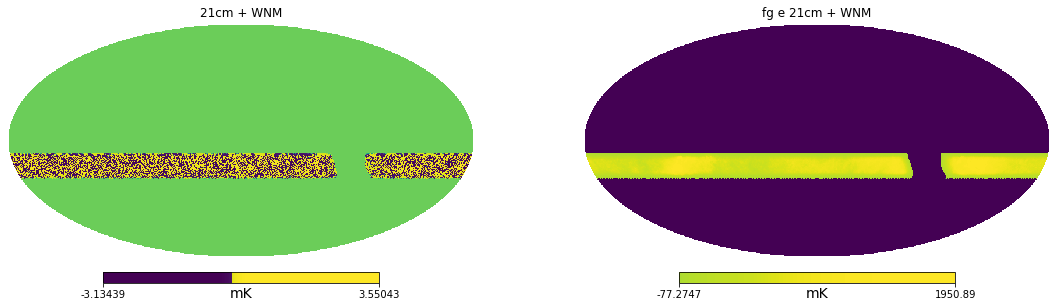

In [34]:
######## fastICA com mapas mascarados (apodizada) E WHITE NOISE
NSIDE = 2**8               #256 
######################################################################################################
######## Leitura dos arquivos
file_mapas_WNM = '/home/luiz/IC/Datas_Maps/Cubos_Input_L11_L25_White_Noise/Cube_Input_WN_L11_M.fits' #Arquivo só com fg + mask apod + white noise
input_X_WNM = load_map(file_mapas_WNM)

file_21_WNM = '/home/luiz/IC/Datas_Maps/Cubos_Prior_WN/Cube_Prior_WN_L11M.fits' #Arquivo só com 21cm + mask apod + white noise
input_21WNM = load_map(file_21_WNM)


    
######################################################################################################

######################################################################################################
######## Visualização dos mapas
mapas=[input_21WNM[13], input_X_WNM[13]] #vetor com os mapas
titulos = ['21cm + WNM', 'fg e 21cm + WNM'] #vetor com os nomes
plt.figure(figsize = (16,4))
for i in range(2):
    hp.mollview(mapas[i],sub = (1,2,i+1), norm='hist', title = titulos[i], nest=False, unit='mK' )  
######################################################################################################

In [36]:
######## fastICA com mapas mascara apodizada e white noise
######################################################################################################
######## Algoritmo fastICA para obter a matriz mistura aproximada
ica = FastICA(n_components=5)
Se = ica.fit_transform(input_X_WNM.T)  # Reconstruct signals
Ae = ica.mixing_  # Get estimated mixing matrix
######## Obtém os mapas separados em 21cm e foregrounds no dicionario X_rec
X_rec = cs.Reconstruction_maps(input_X_WNM, Ae)
######################################################################################################

variância (rec-input):          0.0006572961212166858
desvio padrao (rec-input):          0.025637786979704116


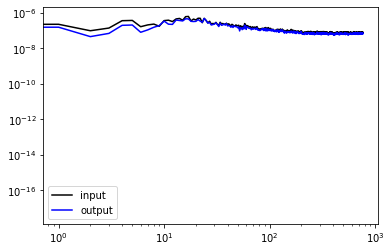

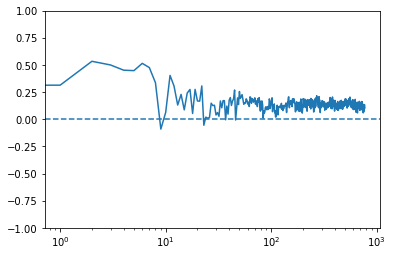

In [39]:
######## Verificação do erro da reconstrução
######################################################################################################
######## Cl's
cl_input = hp.anafast(input_21WNM[13])
cl_output = hp.anafast(X_rec['21cm'][13])
######################################################################################################

######################################################################################################
######## Comparação do espectro de potência do mapa 21cm com o 21cm reconstruido
plt.figure()
plt.plot(cl_input, color = 'black', label='input')
plt.plot(cl_output, color = 'blue', label='output')
plt.xscale('log')
plt.yscale('log')
plt.legend()
######################################################################################################

######################################################################################################
######## Erro grafico
plt.figure()
plt.plot((cl_input - cl_output)/cl_input)
plt.xscale('log')
plt.ylim(-1,1)
plt.axhline(y=0, linestyle='dashed')
######################################################################################################

######################################################################################################
######## Erro 
print('variância (rec-input):         ',np.var((X_rec['21cm'][13])-input_21WNM[13]))
print('desvio padrao (rec-input):         ',np.std((X_rec['21cm'][13])-input_21WNM[13]))
######################################################################################################

/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a reg

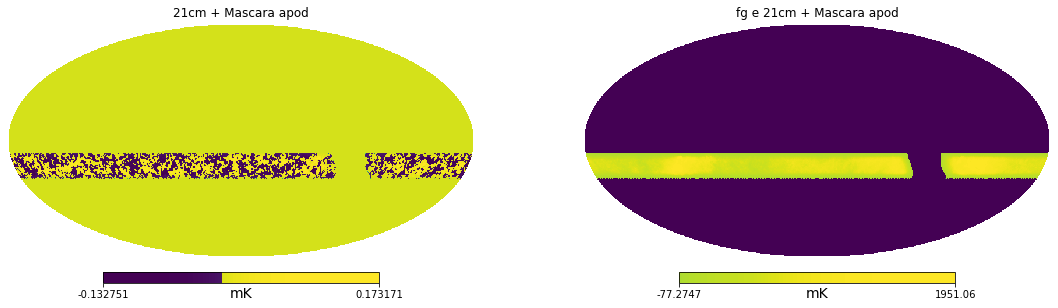

In [41]:
######## fastICA com mapas mascarados (apodizada)
NSIDE = 2**8               #256 
######################################################################################################
######## Leitura dos arquivos
file_mapas_M = '/home/luiz/IC/Datas_Maps/Cubos_Input_Masked/Cube_Input_L11M.fits' #Arquivo só com fg + mask apod
input_X_M = load_map(file_mapas_M)

file_21_M = '/home/luiz/IC/Datas_Maps/Cubos_21cm_Masked/Cube_Prior_L11M.fits' #Arquivo só com 21cm + mask apod
input_21M = load_map(file_21_M)


    
######################################################################################################

######################################################################################################
######## Visualização dos mapas
mapas=[input_21M[13], input_X_M[13]] #vetor com os mapas
titulos = ['21cm + Mascara apod', 'fg e 21cm + Mascara apod'] #vetor com os nomes
plt.figure(figsize = (16,4))
for i in range(2):
    hp.mollview(mapas[i],sub = (1,2,i+1), norm='hist', title = titulos[i], nest=False, unit='mK' )  
######################################################################################################

In [42]:
######## fastICA com mapas mascara apodizada e white noise
######################################################################################################
######## Algoritmo fastICA para obter a matriz mistura aproximada
ica = FastICA(n_components=5)
Se = ica.fit_transform(input_X_M.T)  # Reconstruct signals
Ae = ica.mixing_  # Get estimated mixing matrix
######## Obtém os mapas separados em 21cm e foregrounds no dicionario X_rec
X_rec = cs.Reconstruction_maps(input_X_M, Ae)
######################################################################################################

variância (rec-input):          1.0385712925339692e-05
desvio padrao (rec-input):          0.003222687221146305


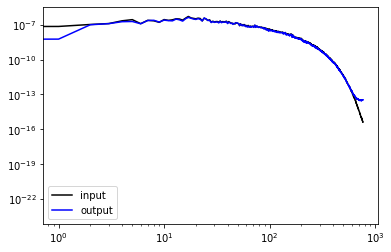

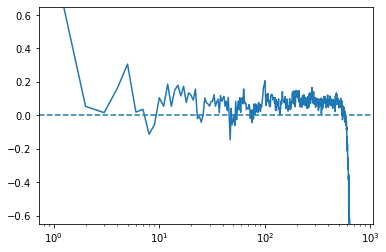

In [46]:
######## Verificação do erro da reconstrução
######################################################################################################
######## Cl's
cl_input = hp.anafast(input_21M[13])
cl_output = hp.anafast(X_rec['21cm'][13])
######################################################################################################

######################################################################################################
######## Comparação do espectro de potência do mapa 21cm com o 21cm reconstruido
plt.figure()
plt.plot(cl_input, color = 'black', label='input')
plt.plot(cl_output, color = 'blue', label='output')
plt.xscale('log')
plt.yscale('log')
plt.legend()
######################################################################################################

######################################################################################################
######## Erro grafico
plt.figure()
plt.plot((cl_input - cl_output)/cl_input)
plt.xscale('log')
plt.ylim(-0.65, 0.65)
plt.axhline(y=0, linestyle='dashed')
######################################################################################################

######################################################################################################
######## Erro 
print('variância (rec-input):         ',np.var((X_rec['21cm'][13])-input_21M[13]))
print('desvio padrao (rec-input):         ',np.std((X_rec['21cm'][13])-input_21M[13]))
######################################################################################################

In [ ]:
######## Usando wavelets


